In [1]:
import os

import matplotlib.pyplot as plt

# import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE

In [2]:
os.getcwd()

'/home/mariia.sidulova/miccai/DomId/notebooks'

In [3]:
def load_files(path):
    #loss = np.loadtxt(path + "training_loss.txt")
    #acc = np.loadtxt(path + "training_accuracy.txt")

    domain = np.loadtxt(path + "domain_labels.txt")

    #te_loss = np.loadtxt(path + "testing_loss.txt")
    #te_acc = np.loadtxt(path + "testing_accuracy.txt")
    loss, acc, te_loss, te_acc = 0, 0, 0, 0
    machine = np.loadtxt(path + "machine_labels.txt")

    Z = np.load(path + "Z_space.npy")

    args = np.loadtxt(path + "arguments.txt", dtype=str, usecols=0)  # , delimiter = '\n')
    img_locs = np.loadtxt(path + "image_locs.txt")
    # machine = []
    # true_label = []
    # for i in img_locs:
    #     #print(i, machine, true_label)
    #     img = i.split("/")[-1]
    #     machine.append(img.split("-")[0])
    #     true_label.append(int(img.split("_")[2]))
    true_label =[]
    return loss, acc, te_loss, te_acc, domain, machine, true_label, Z, args, img_locs

In [27]:
ex = '2023-03-01 15:53:12.638952/'
ex = '2023-03-01 16:18:12.698881/'
ex = '2023-03-01 16:35:24.876163/'
ex = '2023-03-01 16:59:47.831275/'
ex = '2023-03-01 17:40:44.199527/'
ex = '2023-03-01 17:44:10.657544/'
ex = '2023-03-01 17:48:36.050950/'
ex = '2023-03-01 17:57:38.420991/'
ex = '2023-03-01 18:01:54.443951/'
ex = '2023-03-01 18:11:43.148669/'
ex = '2023-03-01 18:16:45.866728/'

ex = '2023-03-01 20:22:36.759216/'
ex = '2023-03-01 20:31:24.646715/'
ex = '2023-03-01 20:53:13.981494/'
ex = '2023-03-01 21:20:05.415287/'
ex = '2023-03-01 21:39:44.170868/'
ex = '2023-03-01 22:41:13.317692/'


ex = '2023-03-02 09:32:32.938849/'


ex = '2023-03-02 10:45:08.598634/'

ex = '2023-03-02 11:58:05.320187/'
ex = '2023-03-06 12:50:37.797660/'
ex = '2023-03-06 13:20:29.174857/'
ex = '2023-03-06 13:29:19.637536/' #MNIST unconditonal 
# ex = '2023-03-06 14:24:47.152872/'
# ex = '2023-03-06 14:36:08.455372/'
# # ex = '2023-03-06 16:41:19.174341/'
# ex = '2023-03-06 17:09:37.508119/'
# ex = '2023-03-06 17:13:47.146490/'

# ex = '2023-03-06 17:24:17.319533/'
# ex ='2023-03-06 17:50:54.327656/'
# # ex = '2023-03-06 18:06:15.595675/'
# ex = '2023-03-06 18:50:17.493444/' #conditional mnist
# # ex = '2023-03-06 20:16:04.396140/'
# ex = '2023-03-08 11:40:27.564593/' #MNIST uncnd with 32 size
ex ='2023-03-08 11:40:47.114047/' #MNIST cond 
# # ex = '2023-03-08 15:00:01.355611/' #DEC
# # ex = '2023-03-08 16:22:11.713138/'
# # ex = '2023-03-08 16:39:40.020110/'
# # ex = '2023-03-08 16:46:04.120239/'
# ex = '2023-03-08 16:50:08.352872/' #DEC 

# # ex = '2023-03-09 13:14:20.373013/'# FINAL base vade
# # ex = '2023-03-09 13:42:22.576637/'
# ex = '2023-03-09 13:14:34.258595/'
ex = '2023-03-09 14:10:31.383808/'
ex = '2023-03-09 16:08:30.730209/'
ex = '2023-03-09 16:08:30.730209/'
ex = '2023-03-09 17:20:28.514918/'

ex = '2023-03-09 17:28:58.961270/' #conditional vade
# ex = '2023-03-09 17:29:14.153074/' #uncoditional 

ex = '2023-03-09 17:37:02.633794/' #DEC


#MNIST 10
ex = '2023-03-14 11:23:24.638123/' #conditional on 10 digits 10 colors
ex = '2023-03-14 11:23:06.765323/' #uconditional on 10 difits 10 colors
ex = '2023-03-14 13:33:54.115991/' #DEC

In [28]:
loss, acc, te_loss, te_acc, domain, digit, true_label, Z, args, color = load_files(ex)


In [29]:
domain = domain-[1]*len(domain)

In [30]:
print(len(domain), len(digit), len(color))

4800 4800 4800


In [31]:
np.unique(domain)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [32]:
np.unique(color)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [33]:
domain = domain[:len(color)]

In [34]:
def something_per_domain(domain, another_label):
    """
    domain - predicted domain labels 
    another_label - some other label that corresponds to each of the predicted domain (
    assumed that both domain and something have the same img_loc reference order 
    """
    u_something = np.unique(another_label)
    u_domain = np.unique(domain)
    print('unique predicted domain', u_domain)
    print('unique true label', u_something)
    
    array_counters=[]
    for i in u_domain:
        for j in u_something:
            counter = 0
            for idx in range(0, len(domain)):
                if domain[idx]==i and another_label[idx]==j:
                    counter+=1
            print('domain ', i, ' digit ', j, ' count', counter)
            array_counters.append(counter)
    return array_counters
                    
        
    

In [35]:
digits_per_domain = something_per_domain(domain, digit)

unique predicted domain [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
unique true label [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
domain  0.0  digit  0.0  count 39
domain  0.0  digit  1.0  count 49
domain  0.0  digit  2.0  count 48
domain  0.0  digit  3.0  count 53
domain  0.0  digit  4.0  count 41
domain  0.0  digit  5.0  count 55
domain  0.0  digit  6.0  count 43
domain  0.0  digit  7.0  count 64
domain  0.0  digit  8.0  count 44
domain  0.0  digit  9.0  count 44
domain  1.0  digit  0.0  count 42
domain  1.0  digit  1.0  count 51
domain  1.0  digit  2.0  count 42
domain  1.0  digit  3.0  count 51
domain  1.0  digit  4.0  count 38
domain  1.0  digit  5.0  count 59
domain  1.0  digit  6.0  count 45
domain  1.0  digit  7.0  count 60
domain  1.0  digit  8.0  count 44
domain  1.0  digit  9.0  count 48
domain  2.0  digit  0.0  count 39
domain  2.0  digit  1.0  count 47
domain  2.0  digit  2.0  count 38
domain  2.0  digit  3.0  count 57
domain  2.0  digit  4.0  count 43
domain  2.0  digit  5.0  count 53
domain  2.

In [36]:
digits_per_domain

[39,
 49,
 48,
 53,
 41,
 55,
 43,
 64,
 44,
 44,
 42,
 51,
 42,
 51,
 38,
 59,
 45,
 60,
 44,
 48,
 39,
 47,
 38,
 57,
 43,
 53,
 49,
 63,
 46,
 45,
 39,
 51,
 45,
 55,
 44,
 54,
 45,
 56,
 44,
 47,
 41,
 43,
 47,
 54,
 42,
 55,
 48,
 56,
 49,
 45,
 44,
 52,
 45,
 49,
 47,
 54,
 46,
 60,
 41,
 42,
 45,
 49,
 47,
 55,
 41,
 58,
 48,
 54,
 34,
 49,
 41,
 52,
 44,
 55,
 40,
 55,
 51,
 61,
 37,
 44,
 41,
 51,
 48,
 53,
 35,
 55,
 50,
 61,
 40,
 46,
 40,
 48,
 45,
 56,
 46,
 47,
 45,
 60,
 41,
 52]

In [37]:
colors_per_domain = something_per_domain(domain, color)

unique predicted domain [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
unique true label [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
domain  0.0  digit  0.0  count 0
domain  0.0  digit  1.0  count 480
domain  0.0  digit  2.0  count 0
domain  0.0  digit  3.0  count 0
domain  0.0  digit  4.0  count 0
domain  0.0  digit  5.0  count 0
domain  0.0  digit  6.0  count 0
domain  0.0  digit  7.0  count 0
domain  0.0  digit  8.0  count 0
domain  0.0  digit  9.0  count 0
domain  1.0  digit  0.0  count 0
domain  1.0  digit  1.0  count 0
domain  1.0  digit  2.0  count 0
domain  1.0  digit  3.0  count 0
domain  1.0  digit  4.0  count 0
domain  1.0  digit  5.0  count 0
domain  1.0  digit  6.0  count 480
domain  1.0  digit  7.0  count 0
domain  1.0  digit  8.0  count 0
domain  1.0  digit  9.0  count 0
domain  2.0  digit  0.0  count 480
domain  2.0  digit  1.0  count 0
domain  2.0  digit  2.0  count 0
domain  2.0  digit  3.0  count 0
domain  2.0  digit  4.0  count 0
domain  2.0  digit  5.0  count 0
domain  2.0  digit  6.0  count

In [38]:
colors_per_domain

[0,
 480,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 480,
 0,
 0,
 0,
 480,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 480,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 480,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 480,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 480,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 480,
 0,
 0,
 0,
 0,
 480,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 480,
 0,
 0]

In [39]:
len(digits_per_domain)

100

In [40]:



def plot_something_per_domain_counts(domain, another_label, counts, fs, legend = False, thres = None):
    """
    domain - predicted domain labels
    another_label - another label aassociated with each predicted domain (should be same shape as domain)
    counts - countes of each another label in each of the predicted domain (see something_per_domain function)
    fs - font size
    colors - colors of each segment on the bargraph
    legend - legend of unique another lables
    thres - if thresholding of another label is required then should be shpecifies (also see apply_threshold function)
    
    """
    u_domains = np.unique(domain)
    N = len(u_domains)
    
    u_another_label = np.unique(another_label)
    print('unique labels', u_another_label, ' N ', N)
    counts = np.array(counts)
    narray = np.array_split(counts, N)

#     if thres:
#         u_another_label_dic = apply_threshold(u_another_label, narray, thres, N)
#         #print(u_another_label_dic.values())
#         u_another_label = list(u_another_label_dic.keys())
#         narray = list(u_another_label_dic.values())
#         narray = np.transpose(narray)

   # print(narray)
    #print(len(u_domains), len(u_another_label))
    c = ['blue', 'teal', 'pink', 'orange', 'green', 'red', 'plum', 'grey', 'purple', 'yellow']
    c = ['lightblue', 'steelblue', 'royalblue', 'mediumpurple', 'darkmagenta','orchid', 'lightpink', 'lightcoral', 'maroon', 'sandybrown']
    plt.figure()
    for i in range(0, len(u_domains)):
        for jj in range(0,len(u_another_label)):
            
            if jj>0:
                bottom = np.sum(narray[i][:jj])
            else:
                bottom = 0
            #print(i, narray[i][jj])
            plt.bar(i, narray[i][jj], bottom = bottom, color = c[jj])
    x = np.linspace(0, N-1, N)
    x_ticks = u_domains
    plt.ylabel("Counts", fontsize=fs)
    plt.xticks(x, x_ticks, fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.xlabel("Domain", fontsize=fs)
   
    if legend:
        plt.legend(legend)
    else:
        plt.legend(u_another_label)
    plt.show()

In [41]:
def plot_something_per_domain_proportion(domain, another_label, counts, fs, legend = False, thres = None, title = None, digit_plot = True):
    """
    domain - predicted domain labels
    another_label - another label aassociated with each predicted domain (should be same shape as domain)
    counts - countes of each another label in each of the predicted domain (see something_per_domain function)
    fs - font size
    colors - colors of each segment on the bargraph
    legend - legend of unique another lables
    thres - if thresholding of another label is required then should be shpecifies (also see apply_threshold function)
    
    """
    u_domains = np.unique(domain)
    N = len(u_domains)
    
    u_another_label = np.unique(another_label)
    print('unique labels', u_another_label)
    print(u_domains)
    counts = np.array(counts)
    narray = np.array_split(counts, N)

    if thres:
        u_another_label_dic = apply_threshold(u_another_label, narray, thres, N)
        #print(u_another_label_dic.values())
        u_another_label = list(u_another_label_dic.keys())
        narray = list(u_another_label_dic.values())
        narray = np.transpose(narray)

   # print(narray)
    #print(len(u_domains), len(u_another_label))
    # c = ['blue', 'teal', 'pink', 'orange', 'green', 'red', 'plum', 'grey', 'purple', 'yellow']
    # c = ['lightblue', 'steelblue', 'royalblue', 'mediumpurple', 'darkmagenta','orchid', 'lightpink', 'lightcoral', 'maroon', 'sandybrown']
    
    if digit_plot:
        c =  ['darkseagreen', 'forestgreen', 'aquamarine', 'lightseagreen', 'teal', 'steelblue','lightblue', 'royalblue','navy', 'lightslategrey' ]

    else:
        c = ['mediumpurple', 'darkmagenta','orchid', 'lightpink', 'lightcoral', 'maroon', 'sandybrown', 'peachpuff', 'goldenrod', 'gold']
  
        
    plt.figure(figsize = (5, 5))
    for i in range(0, len(u_domains)):
        for jj in range(0,len(u_another_label)):
            
            if jj>0:
                bottom = np.sum(narray[i][:jj])/np.sum(narray[i])
            else:
                bottom = 0
            ##print(i, narray[i][jj])
            #print(c[jj])
            plt.bar(i, narray[i][jj]/np.sum(narray[i]), bottom = bottom, color = c[jj])
    x = np.linspace(0, N-1, N)
    x_ticks = [str(item)[0] for item in u_domains]
    #plt.ylabel("Proportion", fontsize=fs)
    plt.xticks(x, x_ticks, fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.xlabel("Domain", fontsize=fs)
    plt.title(title, fontsize = fs, weight = 'bold')
    plt.tick_params(left = False, labelleft = False)
#     if legend:
#         plt.legend(legend, bbox_to_anchor=(0.5, -0.05))
#     else:
#         plt.legend(u_another_label, bbox_to_anchor=(1, 0.70), fancybox=True, shadow=True, fontsize = fs)
    plt.show()

unique labels [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]  N  10


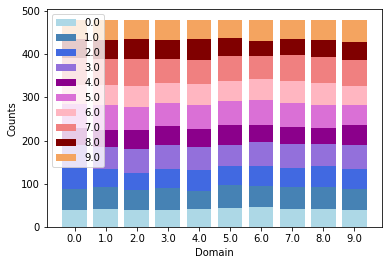

In [42]:
plot_something_per_domain_counts(domain, digit, digits_per_domain, fs =10)

unique labels [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]  N  10


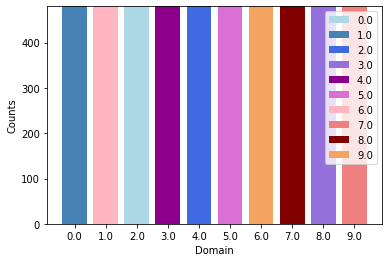

unique labels [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


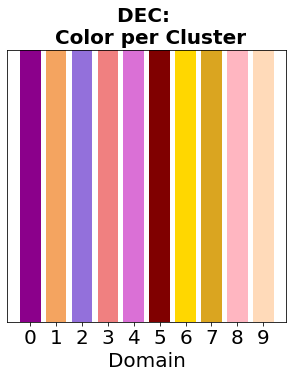

In [43]:
plot_something_per_domain_counts(domain, color, colors_per_domain, fs =10) 
plot_something_per_domain_proportion(domain, color, colors_per_domain, fs =20, title = 'DEC: \n Color per Cluster', digit_plot = False ) 

unique labels [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]  N  10


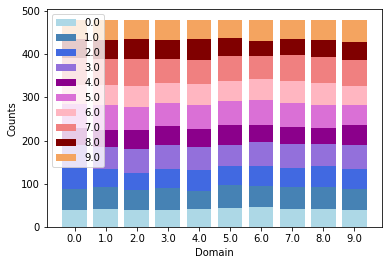

In [44]:
plot_something_per_domain_counts(domain, digit, digits_per_domain, fs =10) #, legend = ['forest background', 'ocean background'])

In [45]:
digit

array([4., 5., 8., ..., 2., 8., 3.])

unique labels [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


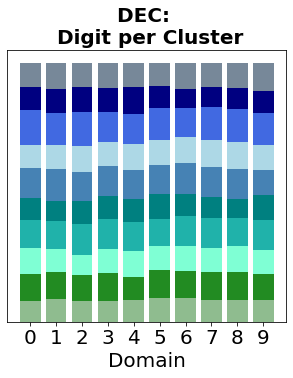

In [46]:
plot_something_per_domain_proportion(domain, digit, digits_per_domain, fs =20, title = 'DEC: \n Digit per Cluster')

In [47]:
np.argmax(np.array_split(digits_per_domain, 5),1)+1

array([ 8,  8, 18, 18,  8])

In [48]:
np.array_split(digits_per_domain, 10)

[array([39, 49, 48, 53, 41, 55, 43, 64, 44, 44]),
 array([42, 51, 42, 51, 38, 59, 45, 60, 44, 48]),
 array([39, 47, 38, 57, 43, 53, 49, 63, 46, 45]),
 array([39, 51, 45, 55, 44, 54, 45, 56, 44, 47]),
 array([41, 43, 47, 54, 42, 55, 48, 56, 49, 45]),
 array([44, 52, 45, 49, 47, 54, 46, 60, 41, 42]),
 array([45, 49, 47, 55, 41, 58, 48, 54, 34, 49]),
 array([41, 52, 44, 55, 40, 55, 51, 61, 37, 44]),
 array([41, 51, 48, 53, 35, 55, 50, 61, 40, 46]),
 array([40, 48, 45, 56, 46, 47, 45, 60, 41, 52])]

In [26]:
np.sum(np.array_split(digits_per_domain, 8), 1)

array([480, 480, 960, 960, 480, 480, 480, 480])